In [44]:
from datetime import datetime, timedelta
import gnss_tools.orbits as orbits
import gnss_tools.time as time
import gnss_tools.coords as coords

In [4]:
import utils

In [8]:
import os
# Create local-data directory for storing downloaded data files
data_dir = os.path.join(os.path.dirname(os.path.dirname(utils.__file__)), "local-data")
os.makedirs(data_dir, exist_ok=True)

In [ ]:
sim_start_dt = datetime(2024, 5, 10)
sim_end_dt = sim_start_dt + timedelta(days=1)
sim_start_gpst = time.convert_datetime_to_gps_seconds(sim_start_dt)
sim_end_gpst = time.convert_datetime_to_gps_seconds(sim_end_dt)

sp3_arrays = orbits.download_and_parse_sp3_data(sim_start_gpst, sim_end_gpst, data_dir, True)
assert sp3_arrays is not None, "Failed to download SP3 data"

In [13]:
sp3_arrays.clock.keys()

dict_keys(['G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G28', 'G29', 'G30', 'G31', 'G32', 'R01', 'R02', 'R03', 'R04', 'R05', 'R07', 'R08', 'R09', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19', 'R20', 'R21', 'R22', 'R24', 'R25', 'R26', 'E02', 'E03', 'E04', 'E05', 'E07', 'E08', 'E09', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E18', 'E19', 'E21', 'E24', 'E25', 'E26', 'E27', 'E30', 'E31', 'E33', 'E34', 'E36', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C16', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C48', 'J02', 'J03', 'J04'])

Text(0.5, 1.0, 'SP3 Estimated Satellite Clocks (Detrended): 2024-05-10 to 2024-05-11')

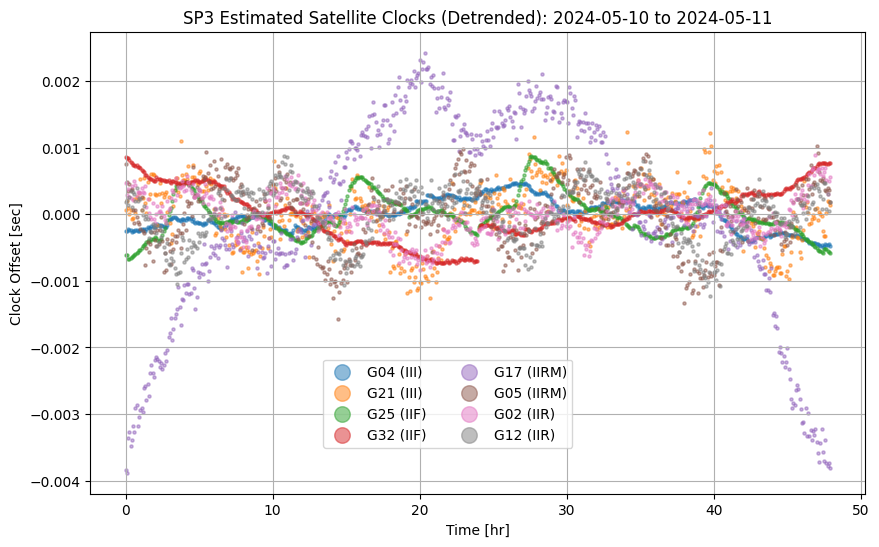

In [42]:
# Plot satellite clocks
import matplotlib.pyplot as plt
import scipy.signal
import gnss_tools.misc.nan_utils as nan_utils

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
plot_epoch_offset_gpst = sim_start_gpst
plot_times = sp3_arrays.epochs - plot_epoch_offset_gpst

prn_examples = {
    "III": [4, 21],
    "IIF": [25, 32],
    "IIRM": [17, 5],
    "IIR": [2, 12]
}
# for sat_id, sat_clock in sp3_arrays.clock.items():
#     if not sat_id.startswith("G"):
#         continue
#     prn = int(sat_id[1:])
#     block_key = None
#     for key, prn_list in prn_examples.items():
#         if prn in prn_list:
#             block_key = key
#             break
#     if block_key is None:
#         continue
for block_key, prn_list in prn_examples.items():
    for prn in prn_list:
        sat_id = f"G{prn:02}"
        sat_clock = sp3_arrays.clock.get(sat_id, None)
        if sat_clock is None:
            continue
        # ax.plot(plot_times / 3600.0, nan_utils.nan_scipy_detrend(sat_clock), marker=".", markersize=5, alpha=.1, label=f"G{prn:02} ({block_key})")
        ax.scatter(plot_times / 3600.0, nan_utils.nan_scipy_detrend(sat_clock), s=5, alpha=.5, label=f"G{prn:02} ({block_key})")
ax.grid()
ax.legend(loc=(.3, .1), ncol=2, markerscale=5)
ax.set_xlabel("Time [hr]")
ax.set_ylabel("Clock Offset [sec]")
ax.set_title(f"SP3 Estimated Satellite Clocks (Detrended): {sim_start_dt:%Y-%m-%d} to {sim_end_dt:%Y-%m-%d}")

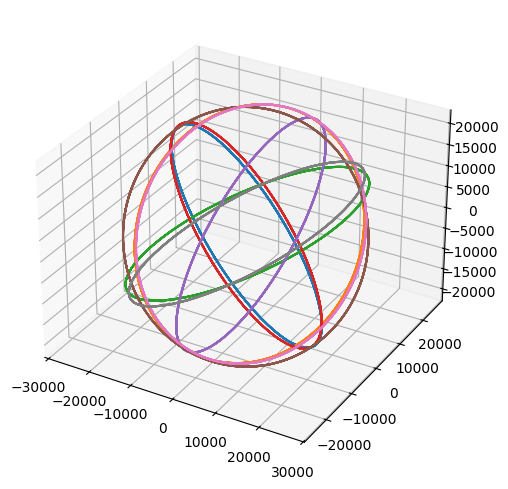

In [ ]:
# plot the satellite orbits
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")
for block_key, prn_list in prn_examples.items():
    for prn in prn_list:
        sat_id = f"G{prn:02}"
        sat_pos_ecf = sp3_arrays.position.get(sat_id, None)
        if sat_pos_ecf is None:
            continue
        ax.plot(sat_pos_ecf[:, 0] / 1e3, sat_pos_ecf[:, 1] / 1e3, sat_pos_ecf[:, 2] / 1e3, label=f"G{prn:02} ({block_key})")
        # sat_pos_eci = coords.ecf2eci(sp3_arrays.epochs, sat_pos)
        # ax.plot(sat_pos_eci[:, 0] / 1e3, sat_pos_eci[:, 1] / 1e3, sat_pos_eci[:, 2] / 1e3, label=f"G{prn:02} ({block_key})")